# Example 5.2 Cantilever beam subjected to stochastic load

We consider a cantilever beam subjected to a distributed stochastic load $q(x,t)$. We neglect all dynamic effects, which means that we assume that the natural frequency of the structure is well above the frequency content of the loading. We assume that the load is a stationary and homogeneous process and that the following cross-correlation function applies

$$ R_q(\tau,\Delta x) = E \left[ q(t,x) q(t+\tau,x+\Delta x)  \right] = \exp \left(-|\tau|\right) \exp \left(-|\Delta x|\right) $$

## Quastion 1: Calculate the auto.correlation function of the bending moment at the support

The bending moment at the support can be obtained by summing all contriution along the beam

$$M(t) = \int_{0}^{L} q(x,t) x dx$$

The auto-correlation function is defined as

$$E\left[M(t) M (t+\tau) \right] = E\left[\int_{0}^{L}\int_{0}^{L} x_1 q(x,t) q(x+\Delta x,t+\tau) x_2dx_{1} dx_{2}\right ] $$

$$E\left[M(t) M (t+\tau) \right] = \int_{0}^{L}\int_{0}^{L} x_1 E\left[ q(x,t) q(x+\Delta x,t+\tau) \right ]x_2dx_{1} dx_{2} $$

$$E\left[M(t) M (t+\tau) \right] = \int_{0}^{L}\int_{0}^{L} x_1 R_q(\tau,\Delta x) x_2dx_{1} dx_{2} $$

$$E\left[M(t) M (t+\tau) \right] = \exp \left(-|\tau|\right) \int_{0}^{L}\int_{0}^{L} x_1 \exp \left(-|\Delta x|\right) x_2dx_{1} dx_{2} $$


### Plot the integrand

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

L = 10.0 # Beam length
x1 = np.linspace(0,L,200)
x2 = np.linspace(0,L,200)

integrand = np.zeros((x1.shape[0],x2.shape[0]))

for k1 in range(x1.shape[0]):
    for k2 in range (x2.shape[0]):
        integrand[k1,k2] = x1[k1]*x2[k2]*np.exp(-np.abs(x1[k1]-x2[k2]))
        
# Plot integrand
x1p, x2p = np.meshgrid(x1, x2)
x3p = integrand

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

surf = ax.plot_surface(x1p, x2p, x3p.T)
ax.view_init(30,250)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$');



### Calculate the integral and plot result

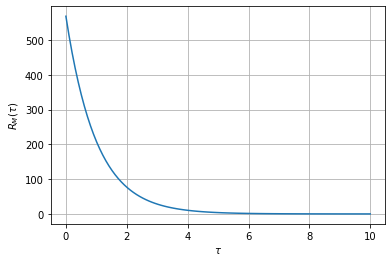

In [70]:
tau = np.linspace(0,10,100)
R = np.exp(-tau)*np.trapz(np.trapz(integrand,x1,axis = 1),x2)

plt.figure()
plt.plot(tau,R)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_M(\tau)$')
plt.grid()
